# Ejercicio 9
## Entrena un Linear SVC en un conjunto de datos separables linealmente. Después, entrena un SVC y un SGDClassifier en el mismo conjunto de datos. Mira si puedes conseguir que produzcan aproximadamente el mismo modelo.

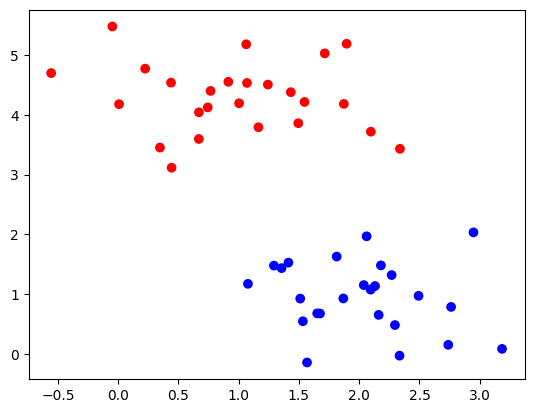

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)

colors = ['red', 'blue']
plt.scatter(X[:, 0], X[:, 1], c=[colors[i] for i in y]);

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

C = 1
alpha = 0.001

linear_svm = LinearSVC(loss="hinge", C=C, random_state=42).fit(X, y)
svm_clf = SVC(kernel="linear", C=C, random_state=42).fit(X, y)
sgd_clf = SGDClassifier(alpha=alpha, random_state=42).fit(X, y)

In [ ]:
# Comparar coeficientes e intercepto de LinearSVC, SVC y SGDClassifier
print("LinearSVC coef:", linear_svm.coef_)
print("LinearSVC intercept:", linear_svm.intercept_)
print()
print("SVC coef:", svm_clf.coef_)
print("SVC intercept:", svm_clf.intercept_)
print()
print("SGDClassifier coef:", sgd_clf.coef_)
print("SGDClassifier intercept:", sgd_clf.intercept_)

LinearSVC coef: [[ 0.30468047 -1.81159721]]
LinearSVC intercept: [-0.09803611]

SVC coef: [[ 0.30487019 -1.81172735]]
SVC intercept: [-0.09798892]

SGDClassifier coef: [[ 0.676714   -3.81063493]]
SGDClassifier intercept: [-0.03144594]


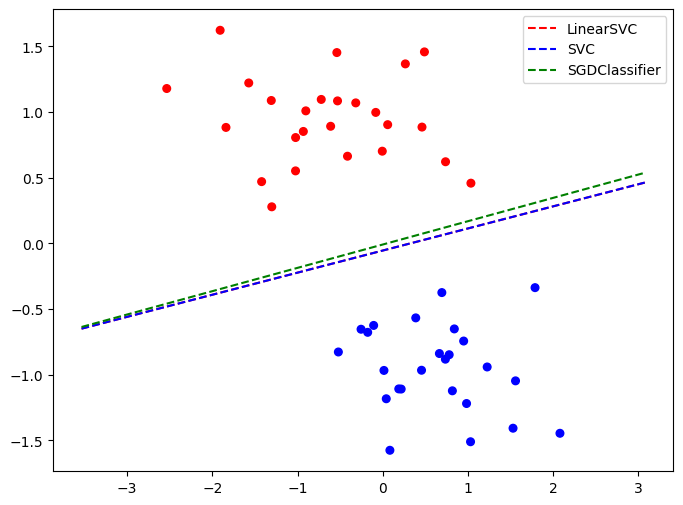

In [ ]:
def plot_decision_boundary(ax, clf, X, label, color):
   # Obtener los límites de los datos
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1

    # Calcular los puntos extremos de la línea de decisión
    x_vals = np.linspace(x_min, x_max, 200)
    y_vals = -(clf.coef_[0][0] * x_vals + clf.intercept_[0]) / clf.coef_[0][1]

    ax.plot(x_vals, y_vals, color=color, linestyle='dashed', label=label)


fig, ax = plt.subplots(figsize=(8, 6))

colors = ['red', 'blue']
ax.scatter(X[:, 0], X[:, 1], c=[colors[i] for i in y], s=30)

plot_decision_boundary(ax, linear_svm, X, label="LinearSVC", color='red')
plot_decision_boundary(ax, svm_clf, X, label="SVC", color='blue')
plot_decision_boundary(ax, sgd_clf, X, label="SGDClassifier", color='green')

ax.legend()
plt.show()

# Ejercicio 10
## Entrena un clasificador SVM en el conjunto de datos wine, que puedes cargar utilizando sklearn.datasets.load_wine(). Este conjunto de datos contiene los análisis químicos de 178 muestras de vino producidas por 3 agricultores diferentes: el objetivo es entrenar un modelo de clasificación capaz de predecir el agricultor basándose en el análisis químico del vino. Puesto que los clasificadores SVM son binarios, tendrás que utilizar one-versus-all para clasificar las tres clases. ¿Qué exactitud puedes lograr?

In [ ]:
import pandas as pd

In [ ]:
from sklearn.datasets import load_wine
wine = load_wine()
X = wine.data
y = wine.target

In [ ]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

In [ ]:
X.shape

(178, 13)

In [ ]:
y.shape

(178,)

In [ ]:
df_X = pd.DataFrame(X, columns=wine.feature_names)

In [ ]:
df_y = pd.DataFrame(y, columns=['class'])
df_y.head()

,class
0,0
1,0
2,0
3,0
4,0


In [ ]:
df_y.value_counts()

,count
class,
1,71
0,59
2,48


In [ ]:
df_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [ ]:
df_X.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.multiclass import OneVsOneClassifier

models = {
    'SVC': OneVsOneClassifier(SVC(random_state=42)),
    'Linear SVC': OneVsOneClassifier(LinearSVC(random_state=42)),
    'SGD': SGDClassifier(random_state=42)
}

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

for model_name, model in models.items():
    pipeline = make_pipeline(StandardScaler(), model)

    # Obtener el score
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)
    print(f"{model_name} Average CV Score: {scores.mean():.4f}")

    # Entrenar el modelo y calcular las predicciones
    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_test)

    # Evaluar precisión
    accuracy = accuracy_score(y_test, predictions)
    print(f"{model_name} Test Accuracy: {accuracy:.4f}")
    print("-----")

SVC Average CV Score: 0.9719
SVC Test Accuracy: 1.0000
-----
Linear SVC Average CV Score: 0.9507
Linear SVC Test Accuracy: 1.0000
-----
SGD Average CV Score: 0.9719
SGD Test Accuracy: 0.9722
-----


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Después de entrenar tu modelo y hacer las predicciones
for model_name, model in models.items():
    pipeline = make_pipeline(StandardScaler(), model)

    # Entrenar el modelo
    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_test)

    # Calcular la matriz de confusión
    cm = confusion_matrix(y_test, predictions)
    print(f"{model_name} Confusion Matrix:")
    print(cm)

    # Visualizar la matriz de confusión
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Matriz de Confusión para {model_name}')
    plt.show()


ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

# Ejecicio 11
## Entrena y perfecciona un regresor SVM en el conjunto de datos de las casas de California Puedes utilizar el conjunto de datos original, en vez de la versión modificada que hemos utilizado en el capítulo 2, que puedes cargar utilizando sklearn.datasets.fetch_california_housing(). Los objetivos representan cientos de miles de dólares. Puesto que hay más de 20.000 instancias, las SVM pueden ser lentas, así que, para el ajuste de hiperparámetros, deberías utilizar muchas menos instancias (por ejemplo, 2.000) para probar muchas más combinaciones de hiperparámetros. ¿Cuál es la RECM de tu mejor modelo?


In [ ]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
X = housing.data
y = housing.target

In [ ]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [ ]:
print(X.shape)
print(y.shape)

(20640, 8)
(20640,)


In [ ]:
df_X = pd.DataFrame(X, columns=housing.feature_names)
df_X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
df_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [ ]:
df_y = pd.DataFrame(y, columns=['price'])
df_y.value_counts()

,count
price,
5.00001,965
1.37500,122
1.62500,117
1.12500,103
1.87500,93
...,...
3.83000,1
3.83100,1
3.83200,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Primer modelo (base)

In [ ]:
from sklearn.svm import SVR
svm_reg_base = make_pipeline(StandardScaler(), SVR())

In [ ]:
scores = -cross_val_score(svm_reg_base, X_train, y_train, scoring='neg_root_mean_squared_error')
print(f"RMSE CV Scores: {np.round(scores, 4)}")
print(f"RMSE CV Average: {scores.mean():.4f}")

RMSE CV Scores: [0.5981 0.5852 0.5909 0.5794 0.6088]
RMSE CV Average: 0.5925


In [ ]:
svm_reg_base.fit(X_train, y_train)
predictions = svm_reg_base.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error

# Evaluar precisión amb el conjunt de TEST
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"Test RMSE: {rmse:.4f}")

Test RMSE: 0.5975


## Fine-Tunning

### Reduced Dataset

In [ ]:
# X_reduced, y_reduced = X[:3000], y[:3000]

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import randint, uniform, loguniform
# param_grid = [{
#     'svr__C': uniform(1, 10),
#     'svr__gamma': loguniform(0.001, 0.1),
# }]

# random_search = RandomizedSearchCV(svm_reg_base, param_distributions=param_grid, n_iter=50, random_state=42, verbose=2)
# random_search.fit(X_reduced, y_reduced)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END svr__C=4.745401188473625, svr__gamma=0.07969454818643935; total time=   0.4s
[CV] END svr__C=4.745401188473625, svr__gamma=0.07969454818643935; total time=   0.4s
[CV] END svr__C=4.745401188473625, svr__gamma=0.07969454818643935; total time=   0.4s
[CV] END svr__C=4.745401188473625, svr__gamma=0.07969454818643935; total time=   0.5s
[CV] END svr__C=4.745401188473625, svr__gamma=0.07969454818643935; total time=   0.4s
[CV] END svr__C=8.31993941811405, svr__gamma=0.015751320499779727; total time=   0.3s
[CV] END svr__C=8.31993941811405, svr__gamma=0.015751320499779727; total time=   0.4s
[CV] END svr__C=8.31993941811405, svr__gamma=0.015751320499779727; total time=   0.4s
[CV] END svr__C=8.31993941811405, svr__gamma=0.015751320499779727; total time=   0.4s
[CV] END svr__C=8.31993941811405, svr__gamma=0.015751320499779727; total time=   0.4s
[CV] END svr__C=2.560186404424365, svr__gamma=0.002051110418843397; total time

RandomizedSearchCV(estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('svr',
                                              SVR(C=4.63629602379294,
                                                  gamma=0.08781408196485974))]),
                   n_iter=50,
                   param_distributions=[{'svr__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7c4b83b6e770>,
                                         'svr__gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7c4b83d582b0>}],
                   random_state=42, verbose=2)

In [ ]:
# df_bp = pd.DataFrame(random_search.cv_results_)
# df_sorted = df_bp.reindex(df_bp['mean_test_score'].abs().sort_values().index)
# df_sorted[['mean_test_score', 'params']].head(20)

,mean_test_score,params
43,-0.010385,"{'svr__C': 8.29606178338064, 'svr__gamma': 0.0..."
33,-0.034742,"{'svr__C': 2.4092422497476265, 'svr__gamma': 0..."
29,-0.111928,"{'svr__C': 1.4522728891053807, 'svr__gamma': 0..."
3,-0.141987,"{'svr__C': 1.5808361216819946, 'svr__gamma': 0..."
36,0.165399,"{'svr__C': 1.055221171236024, 'svr__gamma': 0...."
12,-0.169571,"{'svr__C': 5.56069984217036, 'svr__gamma': 0.0..."
49,-0.187724,"{'svr__C': 1.2541912674409519, 'svr__gamma': 0..."
37,0.192027,"{'svr__C': 8.068573438476172, 'svr__gamma': 0...."
21,-0.192188,"{'svr__C': 1.343885211152184, 'svr__gamma': 0...."
28,-0.221148,"{'svr__C': 1.884925020519195, 'svr__gamma': 0...."


In [ ]:
# random_search.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=2.195942459383017, gamma=0.026698666742744605))])

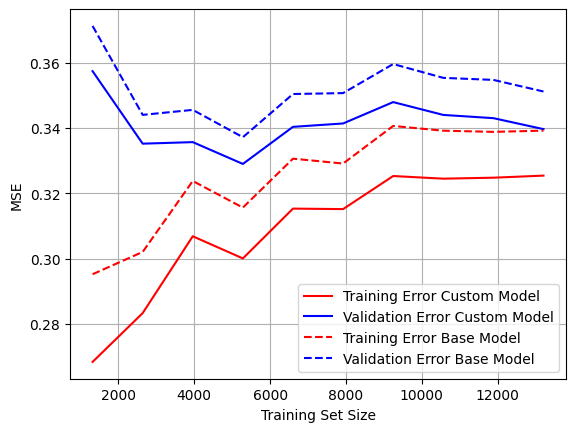

In [ ]:
from sklearn.model_selection import learning_curve

svm_reg_base = make_pipeline(StandardScaler(), SVR())
best_svm_reg = make_pipeline(StandardScaler(), SVR(C=4.63629602379294, gamma=0.08781408196485974))

train_sizes, train_scores, valid_scores = learning_curve(
    best_svm_reg, X_train, y_train, train_sizes = np.linspace(0.1, 1.0, 10), cv=5, scoring='neg_mean_squared_error')

train_sizes_base, train_scores_base, valid_scores_base = learning_curve(
    svm_reg_base, X_train, y_train, train_sizes = np.linspace(0.1, 1.0, 10), cv=5, scoring='neg_mean_squared_error')

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

train_errors_base = -train_scores_base.mean(axis=1)
valid_errors_base = -valid_scores_base.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-", label='Training Error Custom Model')
plt.plot(train_sizes, valid_errors, "b-", label='Validation Error Custom Model')
plt.plot(train_sizes, train_errors_base, "r--", label='Training Error Base Model')
plt.plot(train_sizes, valid_errors_base, "b--", label='Validation Error Base Model')

plt.grid()
plt.xlabel('Training Set Size')
plt.ylabel('MSE')
plt.legend()
plt.show()

Se puede observar como el modelo fine-tuneado rinde mucho mejor que el modelo base

### Whole dataset

In [ ]:
best_model_scores = -cross_val_score(best_svm_reg, X_train, y_train,
                 scoring="neg_root_mean_squared_error")

In [ ]:
print(f"RMSE CV Scores: {np.round(best_model_scores, 4)}")
print(f"RMSE CV Average: {best_model_scores.mean():.4f}")

RMSE CV Scores: [0.5884 0.5747 0.5809 0.5711 0.5985]
RMSE CV Average: 0.5827


### Test new params

In [ ]:
best_svm_reg.fit(X_train, y_train)
best_predictions = best_svm_reg.predict(X_test)

In [ ]:
# Evaluar precisión amb el conjunt de TEST
rmse = np.sqrt(mean_squared_error(y_test, best_predictions))
print(f"Test RMSE: {rmse:.4f}")

Test RMSE: 0.5894
